# **Preprocessing**

##Import data

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nuttidalapthanachai","key":"ee0a24585b49f8ef1fd3f6eab971ee01"}'}

In [ ]:
!mkdir kaggle
!mv kaggle.json kaggle

In [ ]:
!chmod 600 /content/kaggle/kaggle.json

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/kaggle"

In [ ]:
#!kaggle datasets download -d nuttidalapthanachai/nails-data-set
# !kaggle datasets download -d arthitaya/nail-dataset
# !kaggle datasets download -d reubenindustrustech/nail-dataset-new
!kaggle datasets download -d nuttidalapthanachai/nails-new-test

 46% 9.00M/19.7M [00:00<00:00, 94.3MB/s]
100% 19.7M/19.7M [00:00<00:00, 126MB/s] 


In [ ]:
!mkdir nail-dataset && unzip -q nails-new-test.zip -d nail-dataset
# !mkdir nail-dataset-new && unzip -q nail-dataset-new.zip -d nail-dataset-new

In [ ]:
import tensorflow as tf

Adam = tf.keras.optimizers.Adam
to_categorical = tf.keras.utils.to_categorical
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
load_img = tf.keras.preprocessing.image.load_img
img_to_array = tf.keras.preprocessing.image.img_to_array
array_to_img = tf.keras.preprocessing.image.array_to_img

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly import subplots
import plotly

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM, Bidirectional, Embedding, Dropout, BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle as p

import warnings
warnings.filterwarnings('ignore')

In [ ]:
img_rows = 100
img_cols = 100

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
DIRECTORY_DATASET = r'/content/nail-dataset'
CATEGORIES = ["beau's line",'black line','clubbing',"muehrck-e's lines",'onycholysis',"terry's nail",'white spot']
# CATEGORIES = ['black line','clubbing',"muehrck-e's lines",'onycholysis',"terry's nail",'white spot']

In [ ]:
Data=[]

filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

for category in CATEGORIES:
  folder = os.path.join(DIRECTORY_DATASET, category)
  label = CATEGORIES.index(category)
  for img in os.listdir(folder): 
    img_path = os.path.join(folder, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (img_rows, img_cols))
    # img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    # img_arr = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = cv2.filter2D(img_arr,-1,filter)
    img_arr = img_arr[5:95,5:95]
    # gray_r = img_arr.reshape(img_arr.shape[0]*img_arr.shape[1])
    # for i in range(gray_r.shape[0]):
    #   if gray_r[i] > gray_r.mean():
    #     gray_r[i] = 1
    #   else:
    #     gray_r[i] = 0
    #   img_arr = gray_r.reshape(img_arr.shape[0],img_arr.shape[1])
    
    Data.append([img_arr, label])

In [ ]:
print(len(Data))

700


##แบ่งข้อมูลตาม class

In [ ]:
beau = []
black = []
club = []
mees = []
ony = []
terry = []
white = []

In [ ]:
for i in range(len(Data)):
  if Data[i][1] == 0:
    beau.append(Data[i])
  if Data[i][1] == 1:
    black.append(Data[i])
  elif Data[i][1] == 2:
    club.append(Data[i])
  elif Data[i][1] == 3:
    mees.append(Data[i])
  elif Data[i][1] == 4:
    ony.append(Data[i])
  elif Data[i][1] == 5:
    terry.append(Data[i])
  elif Data[i][1] == 6:
    white.append(Data[i])

##Split data

In [ ]:
train_beau, test_beau = train_test_split(beau, test_size=0.2, shuffle=True,random_state=1)
train_black, test_black = train_test_split(black, test_size=0.2, shuffle=True,random_state=1)
train_club, test_club = train_test_split(club, test_size=0.2, shuffle=True,random_state=1)
train_mees, test_mees = train_test_split(mees, test_size=0.2, shuffle=True,random_state=1)
train_ony, test_ony = train_test_split(ony, test_size=0.2, shuffle=True,random_state=1)
train_terry, test_terry = train_test_split(terry, test_size=0.2, shuffle=True,random_state=1)
train_white, test_white = train_test_split(white, test_size=0.2, shuffle=True,random_state=1)

In [ ]:
train_data = np.vstack((train_beau,train_black,train_club,train_mees,train_ony,train_terry,train_white))
test_data = np.vstack((test_beau,test_black,test_club,test_mees,test_ony,test_terry,test_white))

In [ ]:
print(len(train_data))
print(len(test_data))

560
140


In [ ]:
train = []
y = []
test = []
y_test = []

for features, labels in train_data:
  train.append(features)
  y.append(labels)

for features, labels in test_data:
  test.append(features)
  y_test.append(labels)

In [ ]:
train = np.array(train)
y = np.array(y)

test = np.array(test)
y_test = np.array(y_test)

In [ ]:
print("nali train -  rows:",train.shape[0]," columns:", train.shape[1], " rows:", train.shape[2])
print("nail test -  rows:",test.shape[0]," columns:", test.shape[1], " rows:", test.shape[2])

nali train -  rows: 560  columns: 90  rows: 90
nail test -  rows: 140  columns: 90  rows: 90


(-0.5, 89.5, 89.5, -0.5)

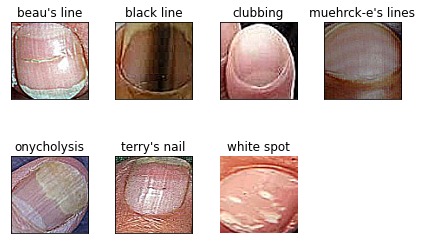

In [ ]:
for i in range(7):
    j=80*i
    ax = plt.subplot(2, 4, 1+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('%s'%(CATEGORIES[int(y[80*i])]))
    plt.imshow(train[j])
    # plt.imshow(train[i])

plt.tight_layout()
plt.savefig('nail.png', dpi=300)
plt.axis('off')

In [ ]:
img_cols = 90
img_rows = 90

In [ ]:
print(train.shape, test.shape)

train = train.reshape((train.shape[0],  img_rows, img_cols, 3))
test = test.reshape((test.shape[0],  img_rows, img_cols, 3))

print(train.shape, test.shape)

(560, 90, 90, 3) (140, 90, 90, 3)
(560, 90, 90, 3) (140, 90, 90, 3)


In [ ]:
train = train / 255.0
test = test / 255.0

In [ ]:
print(y.shape, y_test.shape)
print(y[:10])

(560,) (140,)
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
y = to_categorical(y)
y_test = to_categorical(y_test)

print(y.shape, y_test.shape)
y[:10]

(560, 7) (140, 7)


array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train, y, test_size = 0.2 ,shuffle=True, random_state = 99)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((448, 90, 90, 3), (112, 90, 90, 3), (448, 7), (112, 7))

In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
to_categorical = tf.keras.utils.to_categorical

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import plotly.express as px
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sn

from collections import Counter

# **Baseline model**

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(img_rows, img_cols, 3)))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(5, 5)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(5, 5)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 32)        896       
                                                                 
 activation (Activation)     (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 90, 90, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                        

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.1, min_lr=0.00001)
callbacks_list = [learning_rate_reduction]

In [ ]:
EPOCHS = 1000
BATCH_SIZE = 32

history = model.fit(x_train, y_train,
                  batch_size= BATCH_SIZE,
                  epochs= EPOCHS,
                  # shuffle=True,
                  verbose = 1,
                  validation_data=(x_val, y_val))

Epoch 1/1000
14/14 [==============================] - 16s 41ms/step - loss: 1.9519 - accuracy: 0.1362 - val_loss: 1.9491 - val_accuracy: 0.1250
Epoch 2/1000
14/14 [==============================] - 0s 16ms/step - loss: 1.9287 - accuracy: 0.1696 - val_loss: 1.9366 - val_accuracy: 0.1161
Epoch 3/1000
14/14 [==============================] - 0s 15ms/step - loss: 1.8973 - accuracy: 0.1763 - val_loss: 1.8992 - val_accuracy: 0.2143
Epoch 4/1000
14/14 [==============================] - 0s 15ms/step - loss: 1.8658 - accuracy: 0.2656 - val_loss: 1.8886 - val_accuracy: 0.2054
Epoch 5/1000
14/14 [==============================] - 0s 15ms/step - loss: 1.7429 - accuracy: 0.2991 - val_loss: 1.8630 - val_accuracy: 0.2857
Epoch 6/1000
14/14 [==============================] - 0s 14ms/step - loss: 1.6948 - accuracy: 0.3772 - val_loss: 1.7651 - val_accuracy: 0.3482
Epoch 7/1000
14/14 [==============================] - 0s 15ms/step - loss: 1.5374 - accuracy: 0.4330 - val_loss: 1.8122 - val_accuracy: 0.321

In [ ]:
# def create_trace(x,y,ylabel,color):
#         trace = go.Scatter(
#             x = x,y = y,
#             name=ylabel,
#             marker=dict(color=color),
#             mode = "markers+lines",
#             text=x
#         )
#         return trace
    
# def plot_accuracy_and_loss(train_model):
#     hist = train_model.history
#     acc = hist['accuracy']
#     val_acc = hist['val_accuracy']
#     loss = hist['loss']
#     val_loss = hist['val_loss']
#     epochs = list(range(1,len(acc)+1))
    
#     trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
#     trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
#     trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
#     trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
#     fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
#                                                              'Training and validation loss'))
#     fig.append_trace(trace_ta,1,1)
#     fig.append_trace(trace_va,1,1)
#     fig.append_trace(trace_tl,1,2)
#     fig.append_trace(trace_vl,1,2)
#     fig['layout']['xaxis'].update(title = 'Epoch')
#     fig['layout']['xaxis2'].update(title = 'Epoch')
#     fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
#     fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

#     plotly.offline.iplot(fig, filename='accuracy-loss')
# plot_accuracy_and_loss(history)

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='Green'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='Blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='Magenta'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

     |████████████████████████████████| 795 kB 25.0 MB/s 


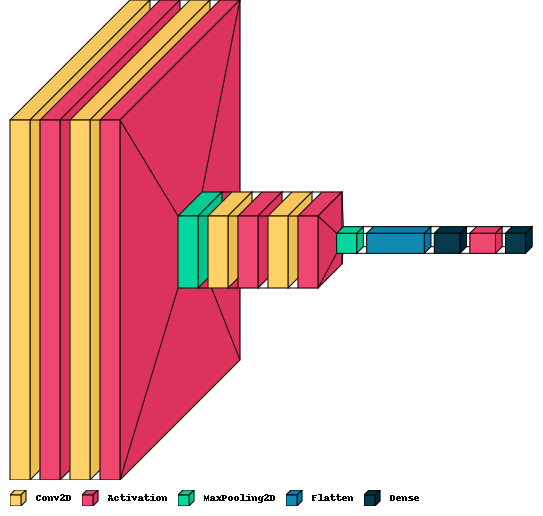

In [ ]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show
# visualkeras.graph_view()
# import tkinter as tk  
# from tkinter import ttk,font  
# # visualkeras.layered_view(model)
from PIL import ImageFont
# # font = ImageFont.load("arial.ttf")
font = ImageFont.load_default()
# # font = ImageFont.truetype("msyhbd.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)

In [ ]:
score = model.evaluate(test, y_test, verbose = 0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 5.60697603225708
Test Accuracy: 0.6428571343421936


In [ ]:
predicted_classes = model.predict(test)
predicted_classes = np.argmax(predicted_classes,axis = 1)

In [ ]:
y_true = np.argmax(y_test,axis = 1)

In [ ]:
c = Counter(y_true)
c

Counter({0: 20, 1: 20, 2: 20, 3: 20, 4: 20, 5: 20, 6: 20})

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm

array([[12,  1,  1,  2,  1,  0,  3],
       [ 1, 13,  1,  2,  0,  3,  0],
       [ 1,  2, 13,  2,  1,  1,  0],
       [ 2,  0,  1, 13,  0,  4,  0],
       [ 0,  0,  0,  2, 13,  1,  4],
       [ 0,  1,  1,  1,  0, 16,  1],
       [ 1,  0,  0,  1,  5,  3, 10]])

In [ ]:
labels = ["Be",'Bl','Cl',"Mu",'On',"Te",'Wh']

In [ ]:
def cm_plot(cm, labels):
    x = labels
    y = labels

    z_text = [[str(y) for y in x] for x in cm]
    fig = ff.create_annotated_heatmap(cm, x=x, y=y, annotation_text=z_text, colorscale='blues')

    fig.update_layout(title_text='Confusion Matrix')

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted Value",
                            xref="paper",
                            yref="paper"
                           ))

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=-0.20,
                            y=0.5,
                            showarrow=False,
                            text="Real Value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"
                           ))

    fig.update_layout(margin=dict(t=50, l=200))
    fig['layout']['yaxis']['autorange'] = "reversed"

    fig['data'][0]['showscale'] = True
    fig.show()

In [ ]:
cm_plot(cm, labels)

In [ ]:
# import seaborn as sn
# import matplotlib.pyplot as plt

# df_cm = pd.DataFrame(cm, range(7), range(7))
# plt.figure(figsize=(12,8))
# sn.set(font_scale=1.3) # for label size
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 13}, fmt='g') # for num predict size

# plt.show()

In [ ]:
report = classification_report(y_true, predicted_classes, target_names=labels, digits=4)
print(report)

              precision    recall  f1-score   support

          Be     0.7059    0.6000    0.6486        20
          Bl     0.7647    0.6500    0.7027        20
          Cl     0.7647    0.6500    0.7027        20
          Mu     0.5652    0.6500    0.6047        20
          On     0.6500    0.6500    0.6500        20
          Te     0.5714    0.8000    0.6667        20
          Wh     0.5556    0.5000    0.5263        20

    accuracy                         0.6429       140
   macro avg     0.6539    0.6429    0.6431       140
weighted avg     0.6539    0.6429    0.6431       140



In [ ]:
predicted_score = model.predict(test)
predicted_score.shape, y_test.shape

((140, 7), (140, 7))

In [ ]:
hovertemplate = 'False Positive Rate=%{x:.4f}<br>True Positive Rate=%{y:.4f}<br>Threshold=%{text:.4f}'
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(predicted_score.shape[1]):
    y_real = y_test[:, i]
    y_score = predicted_score[:, i]

    fpr, tpr, threshold = roc_curve(y_real, y_score)
    auc_score = auc(fpr, tpr)

    name = f"{labels[i]}, AUC={auc_score:.4f}"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines', text=threshold, hovertemplate=hovertemplate))

fig.update_layout(
    title='ROC Curve and AUC',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
)

fig.show()

# **Drop out** 

In [ ]:
datagen = ImageDataGenerator(
    # rotation_range=25, width_shift_range=0.1,
    # height_shift_range=0.1, shear_range=0.2, 
    # zoom_range=0.2,horizontal_flip=True, 
    # fill_mode="nearest"
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range=0.3,         #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05        #Randomly shear images
        )

datagen.fit(x_train)

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(img_rows, img_cols, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.1))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(5, 5)))
model.add(tf.keras.layers.Dropout(0.1))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.1))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(5, 5)))
model.add(tf.keras.layers.Dropout(0.1))


#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.1))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 32)       128       
 ormalization)                                                   
                                                                 
 activation_5 (Activation)   (None, 90, 90, 32)        0         
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 90, 90, 32)       128       
 hNormalization)                                      

In [ ]:
EPOCHS = 1000
BATCH_SIZE = 10

history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs= EPOCHS,
                              # callbacks=callbacks_list, 
                              validation_data = (x_val, y_val),
                              verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/1000
44/44 [==============================] - 3s 38ms/step - loss: 2.2539 - accuracy: 0.1872 - val_loss: 2.0061 - val_accuracy: 0.2143
Epoch 2/1000
44/44 [==============================] - 1s 24ms/step - loss: 1.9962 - accuracy: 0.2409 - val_loss: 2.1243 - val_accuracy: 0.2679
Epoch 3/1000
44/44 [==============================] - 1s 24ms/step - loss: 1.9615 - accuracy: 0.2374 - val_loss: 2.1971 - val_accuracy: 0.1607
Epoch 4/1000
44/44 [==============================] - 1s 25ms/step - loss: 1.8640 - accuracy: 0.2831 - val_loss: 2.2613 - val_accuracy: 0.1607
Epoch 5/1000
44/44 [==============================] - 1s 26ms/step - loss: 1.7466 - accuracy: 0.3151 - val_loss: 2.2530 - val_accuracy: 0.1607
Epoch 6/1000
44/44 [==============================] - 1s 25ms/step - loss: 1.7228 - accuracy: 0.3105 - val_loss: 2.2181 - val_accuracy: 0.1696
Epoch 7/1000
44/44 [==============================] - 1s 26ms/step - loss: 1.6509 - accuracy: 0.3790 - val_loss: 2.1682 - val_accuracy: 0.2857

In [ ]:
# plot_accuracy_and_loss(history)

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='Green'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='Blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='Magenta'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

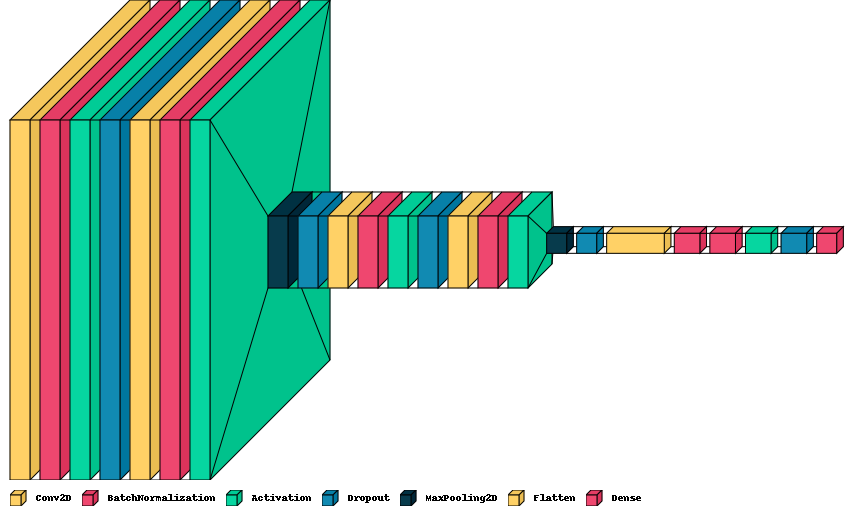

In [ ]:
# !pip install visualkeras
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show
# visualkeras.graph_view()
# import tkinter as tk  
# from tkinter import ttk,font  
# # visualkeras.layered_view(model)
from PIL import ImageFont
# # font = ImageFont.load("arial.ttf")
font = ImageFont.load_default()
# # font = ImageFont.truetype("msyhbd.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)

In [ ]:
score = model.evaluate(test, y_test, verbose = 0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.9210923314094543
Test Accuracy: 0.800000011920929


In [ ]:
predicted_classes = model.predict(test)
predicted_classes = np.argmax(predicted_classes,axis = 1)

In [ ]:
y_true = np.argmax(y_test,axis = 1)

In [ ]:
c = Counter(y_true)
c

Counter({0: 20, 1: 20, 2: 20, 3: 20, 4: 20, 5: 20, 6: 20})

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm

array([[15,  1,  0,  1,  0,  2,  1],
       [ 2, 13,  1,  1,  0,  2,  1],
       [ 1,  0, 19,  0,  0,  0,  0],
       [ 1,  0,  2, 13,  1,  3,  0],
       [ 1,  0,  0,  0, 16,  1,  2],
       [ 0,  0,  1,  0,  0, 19,  0],
       [ 1,  0,  0,  0,  1,  1, 17]])

In [ ]:
# import seaborn as sn
# import matplotlib.pyplot as plt

# df_cm = pd.DataFrame(cm, range(7), range(7))
# plt.figure(figsize=(12,8))
# sn.set(font_scale=1.3) # for label size
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 13}, fmt='g') # for num predict size

# plt.show()

In [ ]:
cm_plot(cm, labels)

In [ ]:
report = classification_report(y_true, predicted_classes, target_names=CATEGORIES, digits=4)
print(report)

                   precision    recall  f1-score   support

      beau's line     0.7143    0.7500    0.7317        20
       black line     0.9286    0.6500    0.7647        20
         clubbing     0.8261    0.9500    0.8837        20
muehrck-e's lines     0.8667    0.6500    0.7429        20
      onycholysis     0.8889    0.8000    0.8421        20
     terry's nail     0.6786    0.9500    0.7917        20
       white spot     0.8095    0.8500    0.8293        20

         accuracy                         0.8000       140
        macro avg     0.8161    0.8000    0.7980       140
     weighted avg     0.8161    0.8000    0.7980       140



In [ ]:
predicted_score = model.predict(test)
predicted_score.shape, y_test.shape

((140, 7), (140, 7))

In [ ]:
hovertemplate = 'False Positive Rate=%{x:.4f}<br>True Positive Rate=%{y:.4f}<br>Threshold=%{text:.4f}'
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(predicted_score.shape[1]):
    y_real = y_test[:, i]
    y_score = predicted_score[:, i]

    fpr, tpr, threshold = roc_curve(y_real, y_score)
    auc_score = auc(fpr, tpr)

    name = f"{labels[i]}, AUC={auc_score:.4f}"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines', text=threshold, hovertemplate=hovertemplate))

fig.update_layout(
    title='ROC Curve and AUC',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
)

fig.show()